# Komuditas FB

Membaca dataset...
Informasi Graf:
 - Jumlah Node (User): 4039
 - Jumlah Edge (Pertemanan): 88234

Menjalankan Algoritma Louvain...
Nilai Modularitas: 0.8349
Jumlah Komunitas ditemukan: 16
Hasil pembagian komunitas disimpan ke 'facebook_communities.csv'
Membuat visualisasi graf (mungkin memakan waktu)...


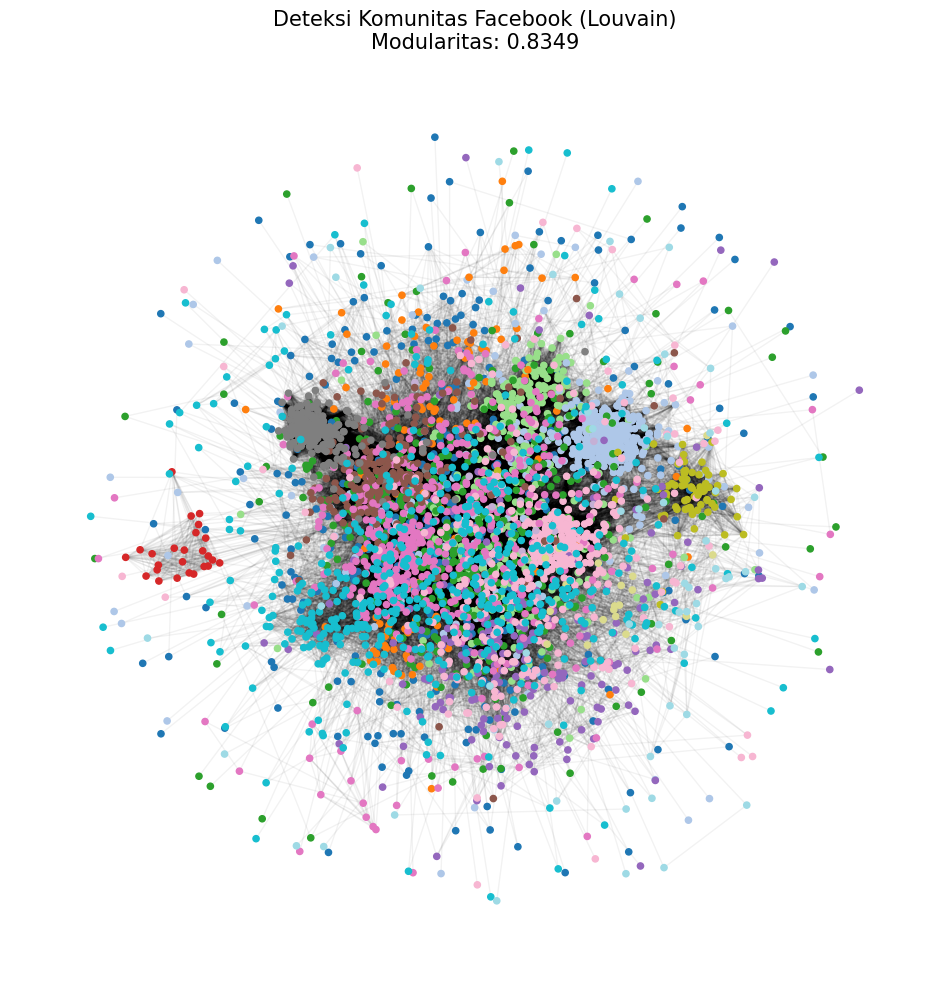

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def process_facebook_data(file_path):
    # 1. Load Data
    # Membaca dataset edge list (format: node1 node2)
    print("Membaca dataset...")
    G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

    print(f"Informasi Graf:")
    print(f" - Jumlah Node (User): {G.number_of_nodes()}")
    print(f" - Jumlah Edge (Pertemanan): {G.number_of_edges()}")

    # 2. Deteksi Komunitas (Algoritma Louvain)
    # Menggunakan implementasi Louvain bawaan NetworkX
    print("\nMenjalankan Algoritma Louvain...")
    communities = nx.community.louvain_communities(G, seed=42)

    # 3. Hitung Modularitas
    # Modularitas mengukur seberapa baik struktur komunitas tersebut
    modularity = nx.community.modularity(G, communities)
    print(f"Nilai Modularitas: {modularity:.4f}")
    print(f"Jumlah Komunitas ditemukan: {len(communities)}")

    # 4. Persiapan Visualisasi
    # Membuat dictionary untuk memetakan setiap node ke ID komunitasnya
    partition = {}
    for idx, comm in enumerate(communities):
        for node in comm:
            partition[node] = idx

    # Simpan hasil pembagian komunitas ke CSV
    df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community_ID'])
    df.to_csv('facebook_communities.csv', index=False)
    print("Hasil pembagian komunitas disimpan ke 'facebook_communities.csv'")

    # 5. Visualisasi Graf
    print("Membuat visualisasi graf (mungkin memakan waktu)...")
    plt.figure(figsize=(12, 12))

    # Menggunakan spring_layout untuk tata letak node
    pos = nx.spring_layout(G, k=0.1, iterations=20, seed=42)

    # Mewarnai node berdasarkan komunitasnya
    cmap = plt.get_cmap('tab20', len(communities))
    node_colors = [partition[n] for n in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_size=20, cmap=cmap, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, alpha=0.05) # Transparansi tinggi agar tidak terlalu penuh

    plt.title(f"Deteksi Komunitas Facebook (Louvain)\nModularitas: {modularity:.4f}", fontsize=15)
    plt.axis('off')
    plt.savefig('facebook_community_graph.png')
    plt.show()

    return G, communities # Mengembalikan graf dan komunitas

# Jalankan fungsi
# Pastikan file facebook_combined.txt ada di folder yang sama
# Menyimpan hasil ke variabel global
G_global, communities_global = process_facebook_data('facebook_combined.txt')

In [ ]:
print("\nAnggota Setiap Komunitas:")
for i, comm in enumerate(communities_global):
    print(f"Komunitas {i+1} (jumlah anggota: {len(comm)}): {list(comm)}")


Anggota Setiap Komunitas:
Komunitas 1 (jumlah anggota: 350): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 3290, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

In [ ]:
# Hitung ukuran setiap komunitas dan simpan sebagai pasangan (ukuran, komunitas)
community_sizes = []
for i, comm in enumerate(communities_global):
    community_sizes.append((len(comm), i, comm))

# Urutkan komunitas berdasarkan ukuran secara menurun
community_sizes.sort(key=lambda x: x[0], reverse=True)

print("\nKomunitas diurutkan berdasarkan jumlah anggota (terbesar ke terkecil):")
for size, comm_id, comm in community_sizes:
    print(f"Komunitas {comm_id + 1}: {size} anggota")

# Komunitas terbesar adalah elemen pertama setelah pengurutan
largest_community_size, largest_community_id, largest_community = community_sizes[0]

print(f"\nAnggota dari Komunitas Terbesar (Komunitas {largest_community_id + 1}, {largest_community_size} anggota):")
print(list(largest_community))


Komunitas diurutkan berdasarkan jumlah anggota (terbesar ke terkecil):
Komunitas 15: 548 anggota
Komunitas 10: 535 anggota
Komunitas 2: 435 anggota
Komunitas 4: 431 anggota
Komunitas 11: 423 anggota
Komunitas 1: 350 anggota
Komunitas 5: 324 anggota
Komunitas 12: 237 anggota
Komunitas 9: 226 anggota
Komunitas 7: 206 anggota
Komunitas 3: 128 anggota
Komunitas 13: 73 anggota
Komunitas 16: 60 anggota
Komunitas 6: 25 anggota
Komunitas 8: 19 anggota
Komunitas 14: 19 anggota

Anggota dari Komunitas Terbesar (Komunitas 15, 548 anggota):
[857, 862, 865, 868, 1085, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509,

### Visualisasi Komunitas Terbesar

Informasi Graf Komunitas Terbesar (Komunitas 15):
 - Jumlah Node: 548
 - Jumlah Edge: 5356


/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1495: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


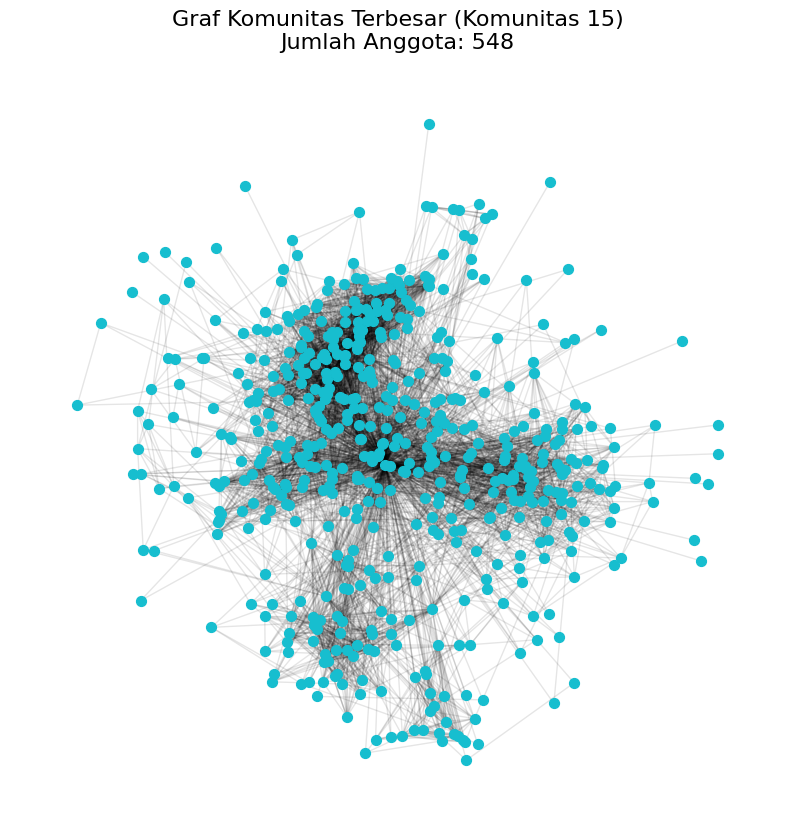

In [ ]:
# Buat subgraph untuk komunitas terbesar
G_largest_community = G_global.subgraph(largest_community)

print(f"Informasi Graf Komunitas Terbesar (Komunitas {largest_community_id + 1}):")
print(f" - Jumlah Node: {G_largest_community.number_of_nodes()}")
print(f" - Jumlah Edge: {G_largest_community.number_of_edges()}")

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_largest_community, k=0.1, iterations=20, seed=42)


# Ambil warna untuk komunitas terbesar dari cmap yang sama dengan visualisasi awal
cmap = plt.get_cmap('tab20', len(communities_global))
# Gunakan warna yang sesuai dengan largest_community_id
node_color_for_largest_comm = cmap(largest_community_id)

nx.draw_networkx_nodes(G_largest_community, pos, node_size=50, node_color=node_color_for_largest_comm)
nx.draw_networkx_edges(G_largest_community, pos, alpha=0.1) # Transparansi agar terlihat lebih jelas

plt.title(f"Graf Komunitas Terbesar (Komunitas {largest_community_id + 1})\nJumlah Anggota: {largest_community_size}", fontsize=16)
plt.axis('off')
plt.savefig(f'facebook_largest_community_graph_{largest_community_id + 1}.png')
plt.show()

In [ ]:
print(f"\nMenjalankan Algoritma Louvain pada Komunitas Terbesar (Komunitas {largest_community_id + 1})...")
sub_communities_largest = nx.community.louvain_communities(G_largest_community, seed=42)

print(f"Jumlah Sub-Komunitas ditemukan dalam Komunitas Terbesar: {len(sub_communities_largest)}")

# Hitung modularitas untuk sub-komunitas ini
sub_modularity_largest = nx.community.modularity(G_largest_community, sub_communities_largest)
print(f"Nilai Modularitas untuk Sub-Komunitas Terbesar: {sub_modularity_largest:.4f}")


Menjalankan Algoritma Louvain pada Komunitas Terbesar (Komunitas 15)...
Jumlah Sub-Komunitas ditemukan dalam Komunitas Terbesar: 9
Nilai Modularitas untuk Sub-Komunitas Terbesar: 0.6203


In [ ]:
print("\nAnggota Setiap Sub-Komunitas dalam Komunitas Terbesar:")
for i, comm in enumerate(sub_communities_largest):
    print(f"Sub-Komunitas {i+1} (jumlah anggota: {len(comm)}): {list(comm)}")



Anggota Setiap Sub-Komunitas dalam Komunitas Terbesar:
Sub-Komunitas 1 (jumlah anggota: 121): [3585, 3844, 3846, 3848, 3849, 3853, 3854, 3856, 3861, 3606, 3863, 3864, 3616, 3879, 3624, 3885, 3632, 3638, 3894, 3899, 3647, 3904, 3905, 3650, 3653, 3910, 3911, 3662, 3918, 3922, 3923, 3669, 3925, 3928, 3673, 3675, 3932, 3935, 3679, 3682, 3939, 3836, 3688, 3691, 3437, 3694, 3439, 3952, 3949, 3954, 3699, 3444, 3441, 3700, 3959, 3704, 3957, 3701, 3451, 3708, 3709, 3453, 3965, 3963, 3961, 3716, 3717, 3974, 3975, 3720, 3465, 3723, 3727, 3729, 3476, 3733, 3742, 3487, 3744, 3745, 3746, 3490, 3748, 3749, 3751, 3757, 3502, 3759, 3504, 3513, 3446, 3771, 3774, 3519, 3447, 3530, 3787, 3531, 3789, 3536, 3798, 3799, 3801, 3546, 3549, 3806, 3807, 3551, 3811, 3812, 3813, 3814, 3816, 3560, 3820, 3566, 3570, 3571, 3579, 3580, 3837]
Sub-Komunitas 2 (jumlah anggota: 22): [3776, 3587, 3655, 3783, 3791, 3920, 3664, 3537, 3478, 3933, 3809, 3747, 3875, 3500, 3887, 3696, 3766, 3960, 3641, 3964, 3901, 3967]
Sub-Kom

/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1495: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


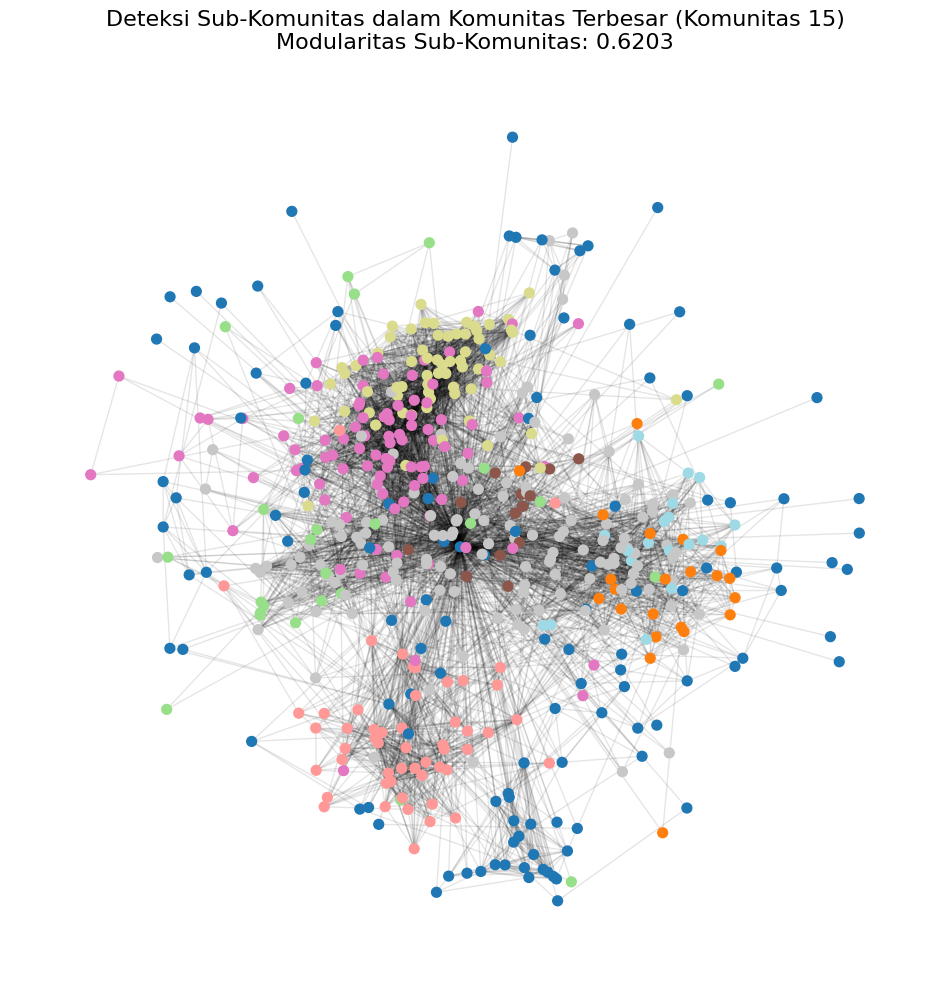

In [ ]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_largest_community, k=0.1, iterations=20, seed=42)

# Memetakan node ke ID sub-komunitasnya di dalam komunitas terbesar
sub_partition = {}
for idx, comm in enumerate(sub_communities_largest):
    for node in comm:
        sub_partition[node] = idx

# Menggunakan cmap yang berbeda untuk sub-komunitas
# Jika ada banyak sub-komunitas, 'tab20' atau 'tab20b' bisa menjadi pilihan yang baik
sub_cmap = plt.get_cmap('tab20', len(sub_communities_largest))
node_colors_sub = [sub_cmap(sub_partition[n]) for n in G_largest_community.nodes()]

nx.draw_networkx_nodes(G_largest_community, pos, node_size=50, cmap=sub_cmap, node_color=node_colors_sub)
nx.draw_networkx_edges(G_largest_community, pos, alpha=0.1)

plt.title(f"Deteksi Sub-Komunitas dalam Komunitas Terbesar (Komunitas {largest_community_id + 1})\nModularitas Sub-Komunitas: {sub_modularity_largest:.4f}", fontsize=16)
plt.axis('off')
plt.savefig(f'facebook_largest_community_sub_graph_{largest_community_id + 1}.png')
plt.show()